In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
train = pd.read_csv("flights_train.csv")
test = pd.read_csv("flights_test.csv")
submit_sample = pd.read_csv("submit_sample.csv")

In [9]:
#print(airlines.head(10))
#print(airports.head(10))
train.head(10)
#print(test.head(10))
#submit_sample.head(10)

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0
5,5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,20.0,18.0,38.0,217.0,1589,602,8.0
6,6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,19.0,11.0,30.0,181.0,1299,526,-17.0
7,7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,44.0,13.0,57.0,273.0,2125,803,-10.0
8,8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,19.0,17.0,36.0,195.0,1464,545,-13.0
9,9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,33.0,12.0,45.0,221.0,1747,711,-15.0


In [22]:
# Data-type checks
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2818553 entries, 0 to 2818552
Data columns (total 18 columns):
 #   Column               Dtype  
---  ------               -----  
 0   id                   int64  
 1   YEAR                 int64  
 2   MONTH                int64  
 3   DAY                  int64  
 4   DAY_OF_WEEK          int64  
 5   AIRLINE              object 
 6   FLIGHT_NUMBER        int64  
 7   TAIL_NUMBER          object 
 8   ORIGIN_AIRPORT       object 
 9   DESTINATION_AIRPORT  object 
 10  SCHEDULED_DEPARTURE  int64  
 11  DEPARTURE_TIME       float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  DISTANCE             int64  
 16  SCHEDULED_ARRIVAL    int64  
 17  ARRIVAL_DELAY        float64
dtypes: float64(5), int64(9), object(4)
memory usage: 387.1+ MB


In [14]:
# Descriptive statistics
train.describe(include='all')

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
count,2.818553e+06,2818553.0,2.818553e+06,2.818553e+06,2.818553e+06,2818553,2.818553e+06,2818553,2818553,2818553,2.818553e+06,2.818553e+06,2.818553e+06,2.818553e+06,2.818553e+06,2.818553e+06,2.818553e+06,2.818553e+06
unique,NaN,NaN,NaN,NaN,NaN,14,NaN,4688,322,322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,WN,NaN,N477HA,ATL,ATL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,610684,NaN,2024,183656,183537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.409276e+06,2015.0,3.573126e+00,1.562678e+01,3.938906e+00,NaN,2.192953e+03,NaN,NaN,NaN,1.329533e+03,1.337376e+03,1.613164e+01,1.359705e+03,1.413717e+02,8.191704e+02,1.497113e+03,6.001171e+00
std,8.136463e+05,0.0,1.703931e+00,8.704137e+00,1.986157e+00,NaN,1.774639e+03,NaN,NaN,NaN,4.814211e+02,4.950658e+02,9.226391e+00,4.964894e+02,7.501261e+01,6.033737e+02,5.036512e+02,4.065076e+01
min,0.000000e+00,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.800000e+01,3.100000e+01,1.000000e+00,-8.700000e+01
25%,7.046380e+05,2015.0,2.000000e+00,8.000000e+00,2.000000e+00,NaN,7.330000e+02,NaN,NaN,NaN,9.200000e+02,9.230000e+02,1.100000e+01,9.380000e+02,8.500000e+01,3.730000e+02,1.112000e+03,-1.300000e+01
50%,1.409276e+06,2015.0,4.000000e+00,1.600000e+01,4.000000e+00,NaN,1.673000e+03,NaN,NaN,NaN,1.325000e+03,1.331000e+03,1.400000e+01,1.344000e+03,1.230000e+02,6.490000e+02,1.521000e+03,-4.000000e+00
75%,2.113914e+06,2015.0,5.000000e+00,2.300000e+01,6.000000e+00,NaN,3.354000e+03,NaN,NaN,NaN,1.730000e+03,1.740000e+03,1.900000e+01,1.754000e+03,1.740000e+02,1.061000e+03,1.919000e+03,1.000000e+01


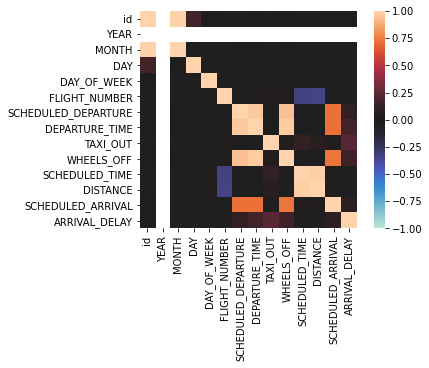

In [111]:
# Correlation matrix
corr = train.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=True)

In [25]:
# Duplicate records
duprec = train[train.duplicated()]
print("Number of duplicate records: ", duprec.shape)

Number of duplicate records:  (0, 18)


In [99]:
# Column analysis function
def outlierDetect(df, col):
    q1 = col.quantile(.25)
    q3 = col.quantile(.75)

    IQR = q3-q1
    lower_limit = q1-(1.5*IQR)
    upper_limit = q3+(1.5*IQR)

    ol = []
    for val in col:
        if val < lower_limit or val > upper_limit:
            ol.append(val)
    
    return len(ol)
    
def plotChart(col):
    fix, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
    sns.boxplot(col,orient='v',ax=ax1)
    ax1.set_ylabel = col.name
    ax1.set_title("Box plot of {}".format(col.name))
    sns.distplot(col, ax=ax2)
    ax2.set_title("Distribution of {}".format(col.name))

def col_analysis(df, col):
    print("*****Column name: {} *****".format(col.name))
    print("Outliers: ", outlierDetect(df, col))
    print("Min: ", format(np.min(col)))    
    print("Mean: ", format(round(np.mean(col),2)))
    print("Median: ", format(np.median(col)))
    print("std: ", format(round(np.std(col),2)))    
    print("Max: ", format(np.max(col)))
    print("Missing values: ", format(col.isnull().sum()))
    print("% of Missing values: ", format(round((col.isnull().sum()/len(col))*100, 2)))
    plotChart(col)

*****Column name: id *****
Outliers:  0
Min:  0
Mean:  1409276.0
Median:  1409276.0
std:  813646.17
Max:  2818552
Missing values:  0
% of Missing values:  0.0
*****Column name: YEAR *****
Outliers:  0
Min:  2015
Mean:  2015.0
Median:  2015.0
std:  0.0
Max:  2015
Missing values:  0
% of Missing values:  0.0


/Users/suvendukumarpati/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


*****Column name: MONTH *****
Outliers:  0
Min:  1
Mean:  3.57
Median:  4.0
std:  1.7
Max:  6
Missing values:  0
% of Missing values:  0.0
*****Column name: DAY *****
Outliers:  0
Min:  1
Mean:  15.63
Median:  16.0
std:  8.7
Max:  31
Missing values:  0
% of Missing values:  0.0
*****Column name: DAY_OF_WEEK *****
Outliers:  0
Min:  1
Mean:  3.94
Median:  4.0
std:  1.99
Max:  7
Missing values:  0
% of Missing values:  0.0
*****Column name: FLIGHT_NUMBER *****
Outliers:  13204
Min:  1
Mean:  2192.95
Median:  1673.0
std:  1774.64
Max:  9320
Missing values:  0
% of Missing values:  0.0
*****Column name: SCHEDULED_DEPARTURE *****
Outliers:  0
Min:  1
Mean:  1329.53
Median:  1325.0
std:  481.42
Max:  2359
Missing values:  0
% of Missing values:  0.0
*****Column name: DEPARTURE_TIME *****
Outliers:  0
Min:  1.0
Mean:  1337.38
Median:  1331.0
std:  495.07
Max:  2400.0
Missing values:  0
% of Missing values:  0.0
*****Column name: TAXI_OUT *****
Outliers:  147336
Min:  1.0
Mean:  16.13
Median: 

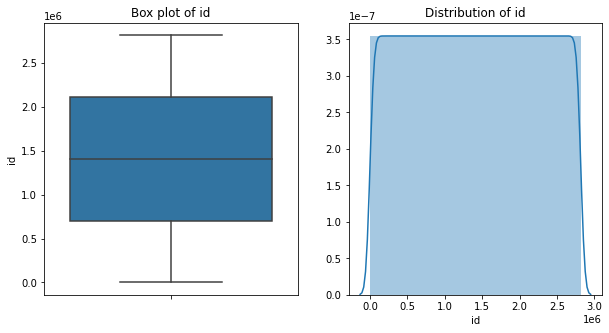

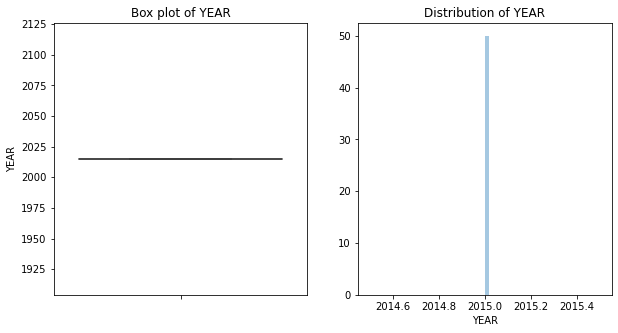

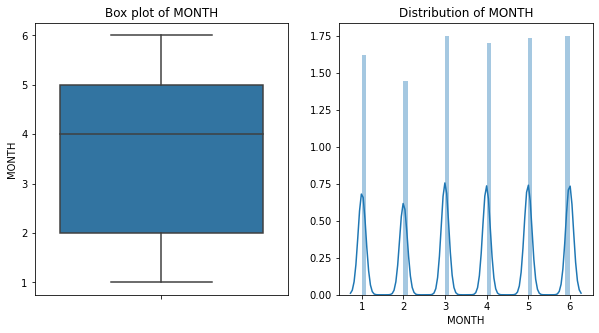

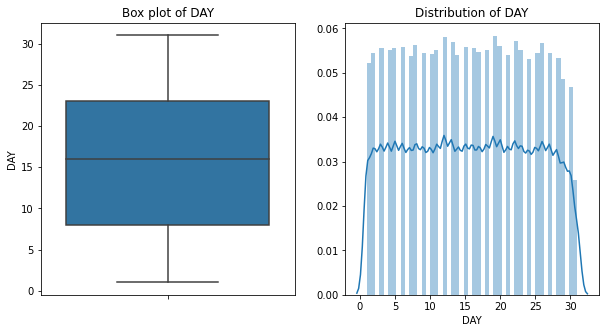

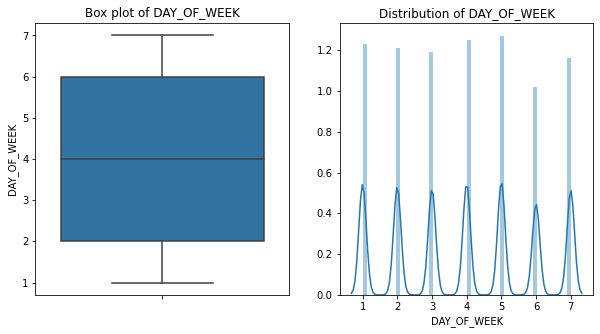

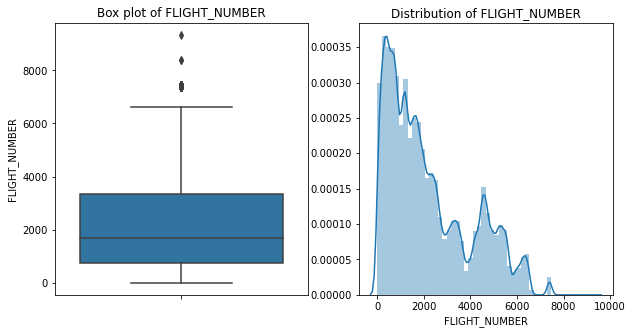

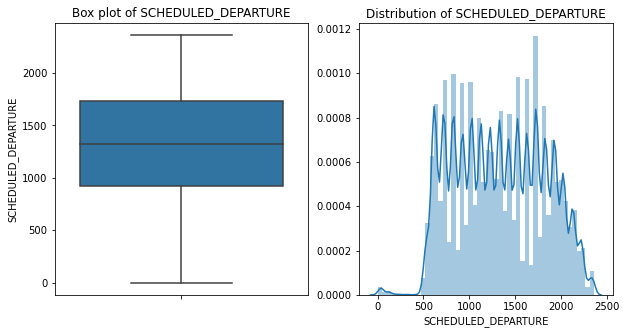

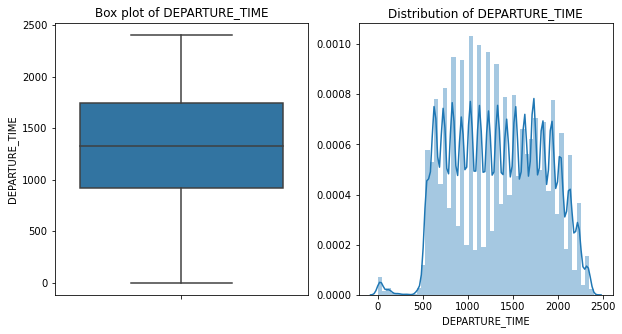

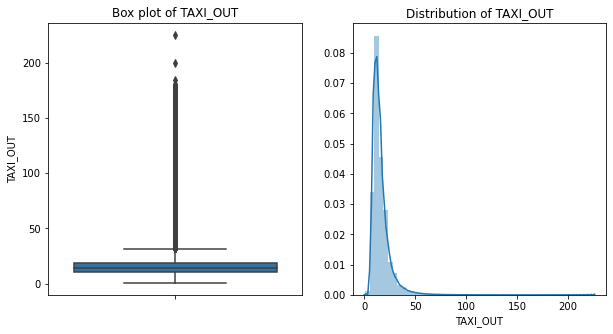

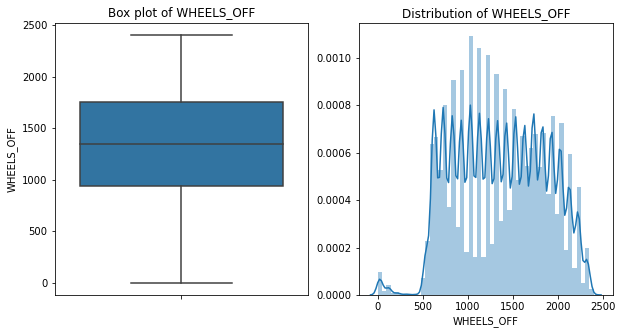

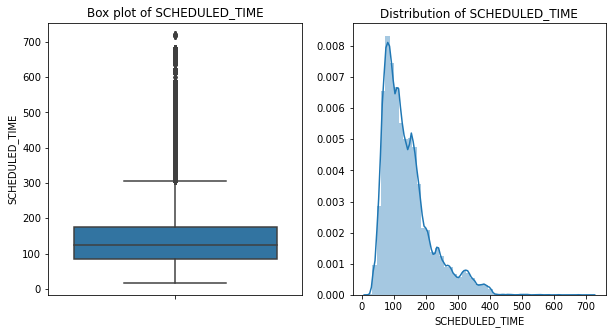

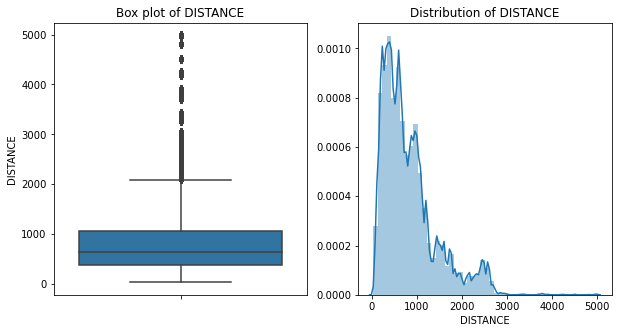

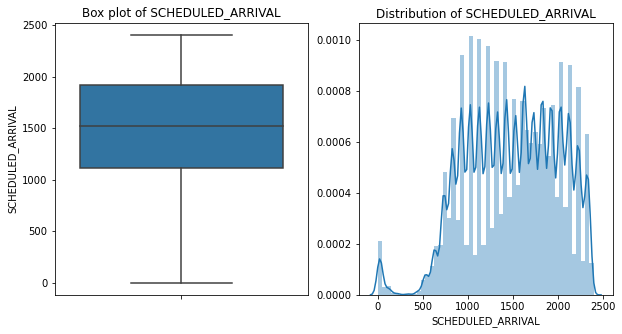

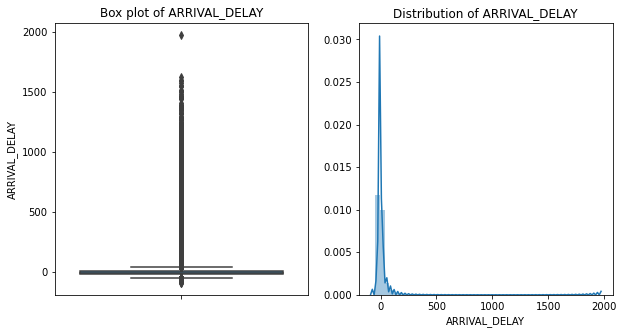

In [100]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numcols = train.select_dtypes(include=numerics)
collst = list(numcols)

for col in collst:
    col_analysis(train, train[col])

#col_analysis(train, train.ARRIVAL_DELAY)
#col_analysis(train, train.SCHEDULED_ARRIVAL)

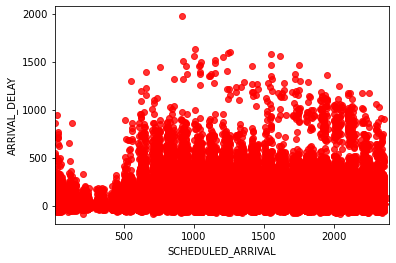

In [112]:
# Scatterplot
sns.regplot(x=train.SCHEDULED_ARRIVAL, y=train.ARRIVAL_DELAY, color="r", ci=None)

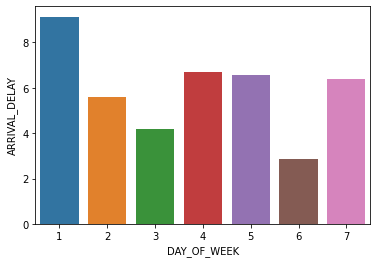

In [114]:
# Barplot
sns.barplot(x=train.DAY_OF_WEEK, y=train.ARRIVAL_DELAY, ci=None)

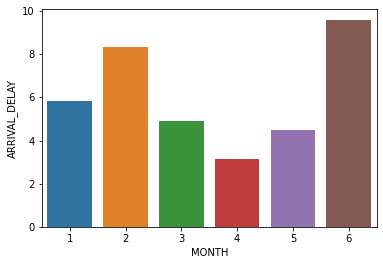

In [121]:
sns.barplot(x=train.MONTH, y=train.ARRIVAL_DELAY, ci=None)

Number of Airlines: 14


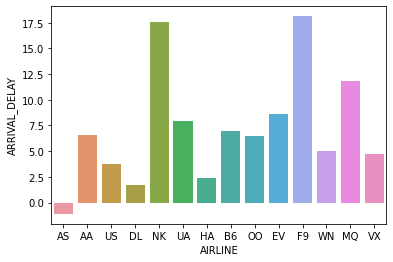

In [120]:
print("Number of Airlines: {}".format(len(set(train.AIRLINE))))
sns.barplot(x=train.AIRLINE, y=train.ARRIVAL_DELAY, ci=None)